In [1]:
%pip install transformers


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install -Uq transformers.utils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement transformers.utils (from versions: none)
ERROR: No matching distribution found for transformers.utils

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install pandas
%pip install nltk
%pip install -U scikit-learn

import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Евгений\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
%pip install datasets



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/521.2 kB ? eta -:--:--
     -- ------------------------------------- 30.7/521.2 kB ? eta -:--:--
     ------ -------------------------------- 92.2/521.2 kB 1.3 MB/s eta 0:00:01
     -------------- ----------------------- 194.6/521.2 kB 1.7 MB/s eta 0:00:01
     ----------------- -------------------- 245.8/521.2 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  512.0/521.2 kB 2.7 MB/s eta 0:00:01
     -------------------------------------- 521.2/521.2 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/24.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/24.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/24.6 MB ? eta -:--:--
     - -------------------------------------- 0.6/24.6 MB 5.6 MB/s eta 0:00:05
     - -------------------------------------- 0.8/24.6 MB 4.3 MB/s eta 0:00:06
     - -------------------------------------- 1.1/24.6 MB 5.2 MB/s eta 0:00:05

In [ ]:

%pip install -U transformers
%pip install torch

In [9]:

import torch
import random
import numpy as np
import transformers
import torch.nn as nn
from transformers import AutoModel, BertTokenizer, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
from datasets import load_metric, Dataset
from sklearn.metrics import classification_report, f1_score



In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [11]:
%pip install tqdm
import tqdm


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
%pip install tensorflow

     ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/300.9 MB 1.4 MB/s eta 0:03:41
     ---------------------------------------- 0.1/300.9 MB 1.3 MB/s eta 0:03:50
     ---------------------------------------- 0.2/300.9 MB 1.7 MB/s eta 0:02:55
     ---------------------------------------- 0.4/300.9 MB 2.5 MB/s eta 0:02:01
     ---------------------------------------- 0.7/300.9 MB 3.1 MB/s eta 0:01:36
     ---------------------------------------- 0.8/300.9 MB 3.5 MB/s eta 0:01:27
     ---------------------------------------- 0.8/300.9 MB 3.5 MB/s eta 0:01:27
     ---------------------------------------- 0.8/300.9 MB 3.5 MB/s eta 0:01:27
     ---------------------------------------- 1.7/300.9 MB 4.6 MB/s eta 0:01:05
     ---------------------------------------- 1.9/300.9 MB 4.4 MB/s eta 0:01:09
     ---------------------------------------- 2.0/300.9 MB 4.0 MB/s eta 0:01:15
     ---------------------------------------- 2


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
%pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPool1D, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint

In [15]:
num_words = 10000
max_review_len = 100

In [16]:
data = pd.read_csv('bank.csv', sep='\t', comment='#')
data.head()

,idx,Score,Text
0,0,Positive,В Альфа-Банке работает замечательная девушка -...
1,1,Negative,Оформляя рассрочку в м. Видео в меге тёплый ст...
2,2,Positive,Очень порадовала оперативность работы в банке....
3,3,Negative,Имела неосторожность оформить потреб. кредит в...
4,4,Negative,Небольшая предыстория: Нашел на сайте MDM банк...


In [17]:
data.Score.replace("Positive", 1, inplace=True)
data.Score.replace("Negative", 2, inplace=True)
data.head()

,idx,Score,Text
0,0,1,В Альфа-Банке работает замечательная девушка -...
1,1,2,Оформляя рассрочку в м. Видео в меге тёплый ст...
2,2,1,Очень порадовала оперативность работы в банке....
3,3,2,Имела неосторожность оформить потреб. кредит в...
4,4,2,Небольшая предыстория: Нашел на сайте MDM банк...


In [18]:
stemmer = SnowballStemmer('russian')
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return " ".join(text)

In [19]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return filtered_text

In [20]:
def num_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [21]:
data['word count'] = data['Text'].apply(num_of_words)
data.head()

,idx,Score,Text,word count
0,0,1,В Альфа-Банке работает замечательная девушка -...,110
1,1,2,Оформляя рассрочку в м. Видео в меге тёплый ст...,273
2,2,1,Очень порадовала оперативность работы в банке....,177
3,3,2,Имела неосторожность оформить потреб. кредит в...,155
4,4,2,Небольшая предыстория: Нашел на сайте MDM банк...,548


In [23]:
import nltk
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [24]:
data.Text = data['Text'].apply(data_processing)
data.head()

,idx,Score,Text,word count
0,0,1,"[альфабанке, работает, замечательная, девушка,...",110
1,1,2,"[оформляя, рассрочку, м, видео, меге, тёплый, ...",273
2,2,1,"[очень, порадовала, оперативность, работы, бан...",177
3,3,2,"[имела, неосторожность, оформить, потреб, кред...",155
4,4,2,"[небольшая, предыстория, нашел, сайте, mdm, ба...",548


In [25]:
data = data.drop_duplicates('Text')


In [26]:
data.Text = data['Text'].apply(lambda x: stemming(x))


In [27]:
data.head()

,idx,Score,Text,word count
0,0,1,альфабанк работа замечательн девушк ильясов ор...,110
1,1,2,оформл рассрочк м виде мег тепл стан попрос ме...,273
2,2,1,очен порадова оперативн работ банк заказа инте...,177
3,3,2,имел неосторожн оформ потреб кред альфабанк оч...,155
4,4,2,небольш предыстор нашел сайт mdm банк интересн...,548


In [28]:
pos_scores = data[data.Score == 1]

In [29]:
count = Counter()
for text in pos_scores['Text'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('банк', 26071),
 ('карт', 12398),
 ('эт', 8836),
 ('очен', 6952),
 ('отделен', 6256),
 ('котор', 6077),
 ('сотрудник', 5983),
 ('мо', 5900),
 ('клиент', 5777),
 ('вопрос', 4702),
 ('счет', 4616),
 ('сво', 4435),
 ('офис', 4004),
 ('деньг', 3924),
 ('работ', 3857)]

In [30]:
data['word count'] = data['Text'].apply(num_of_words)
data.head()

,idx,Score,Text,word count
0,0,1,альфабанк работа замечательн девушк ильясов ор...,69
1,1,2,оформл рассрочк м виде мег тепл стан попрос ме...,147
2,2,1,очен порадова оперативн работ банк заказа инте...,113
3,3,2,имел неосторожн оформ потреб кред альфабанк оч...,93
4,4,2,небольш предыстор нашел сайт mdm банк интересн...,338


In [31]:
pos_texts = data[data.Score == 1]
pos_texts.head()

,idx,Score,Text,word count
0,0,1,альфабанк работа замечательн девушк ильясов ор...,69
2,2,1,очен порадова оперативн работ банк заказа инте...,113
5,5,1,конц феврал оформ кредитн карт банк авангард к...,95
10,10,1,год назад получ кредитк выбра банк изз стоимос...,126
11,11,1,отделен автозаводск 01072015 пополня карточк б...,24


In [32]:
count = Counter()
for text in pos_texts['Text'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('банк', 26071),
 ('карт', 12398),
 ('эт', 8836),
 ('очен', 6952),
 ('отделен', 6256),
 ('котор', 6077),
 ('сотрудник', 5983),
 ('мо', 5900),
 ('клиент', 5777),
 ('вопрос', 4702),
 ('счет', 4616),
 ('сво', 4435),
 ('офис', 4004),
 ('деньг', 3924),
 ('работ', 3857)]

In [33]:
pos_texts = pd.DataFrame(count.most_common(15))
pos_texts.columns = ['word', 'count']
pos_texts.head(15)

,word,count
0,банк,26071
1,карт,12398
2,эт,8836
3,очен,6952
4,отделен,6256
5,котор,6077
6,сотрудник,5983
7,мо,5900
8,клиент,5777
9,вопрос,4702


In [34]:
neg_texts = data[data.Score == 2]
neg_texts.head()

,idx,Score,Text,word count
1,1,2,оформл рассрочк м виде мег тепл стан попрос ме...,147
3,3,2,имел неосторожн оформ потреб кред альфабанк оч...,93
4,4,2,небольш предыстор нашел сайт mdm банк интересн...,338
6,6,2,месяц назад взял автокред ход разн салон форд ...,248
7,7,2,говор махинац бонус остановл процент среднемес...,86


In [35]:
count = Counter()
for text in neg_texts['Text'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('банк', 31386),
 ('карт', 17814),
 ('эт', 11947),
 ('мо', 9693),
 ('счет', 8944),
 ('котор', 8364),
 ('сотрудник', 8336),
 ('отделен', 7046),
 ('клиент', 6674),
 ('деньг', 6519),
 ('ответ', 6376),
 ('сказа', 6229),
 ('сумм', 5925),
 ('дан', 5808),
 ('сво', 5152)]

In [36]:
neg_texts = pd.DataFrame(count.most_common(15))
neg_texts.columns = ['word', 'count']
neg_texts.head()

,word,count
0,банк,31386
1,карт,17814
2,эт,11947
3,мо,9693
4,счет,8944


In [37]:
X = data['Text']
Y = data['Score']


In [38]:
vect = TfidfVectorizer()
X = vect.fit_transform(data['Text'])

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .3)

In [40]:
log_regression = LogisticRegression()
log_regression.fit(x_train, y_train)
log_predict = log_regression.predict(x_test)
log_accuracy = accuracy_score(log_predict, y_test)
print("Итак модель акинатор на: {:.1%}".format(log_accuracy))

Итак модель акинатор на: 94.5%


In [ ]:
%pip install datasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: C:\Users\asdsf\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
train_d = data.iloc[:12000]
test_d = data.iloc[12000:]

In [42]:
x_train_d = train_d['Text']
y_train_d = train_d['Score'] - 1

In [43]:
texts = x_train_d

In [44]:
tokenizer = Tokenizer(num_words=num_words)

In [45]:
tokenizer.fit_on_texts(texts)

In [46]:
sequences = tokenizer.texts_to_sequences(texts)

In [47]:
x_train_d = pad_sequences(sequences, maxlen=max_review_len)

In [48]:
model = Sequential()
model.add(Embedding(num_words, 64, input_length=max_review_len))
model.add(Conv1D(250, 5, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 conv1d (Conv1D)             (None, 96, 250)           80250     
                                                                 
 global_max_pooling1d (Glob  (None, 250)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               32128     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

In [51]:
history = model.fit(x_train_d, 
                    y_train_d, 
                    epochs=4,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/4


85/85 [==============================] - 11s 102ms/step - loss: 0.4962 - accuracy: 0.7532 - val_loss: 0.2136 - val_accuracy: 0.9117
Epoch 2/4
85/85 [==============================] - 8s 95ms/step - loss: 0.1684 - accuracy: 0.9359 - val_loss: 0.1833 - val_accuracy: 0.9292
Epoch 3/4
85/85 [==============================] - 8s 97ms/step - loss: 0.0796 - accuracy: 0.9757 - val_loss: 0.2114 - val_accuracy: 0.9258
Epoch 4/4
85/85 [==============================] - 9s 100ms/step - loss: 0.0304 - accuracy: 0.9918 - val_loss: 0.2499 - val_accuracy: 0.9225


In [53]:
%pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB 1.3 MB/s eta 0:00:06
      --------------------------------------- 0.1/7.6 MB 1.1 MB/s eta 0:00:07
     - -------------------------------------- 0.2/7.6 MB 1.5 MB/s eta 0:00:05
     - -------------------------------------- 0.4/7.6 MB 2.1 MB/s eta 0:00:04
     --- ------------------------------------ 0.6/7.6 MB 2.6 MB/s eta 0:00:03
     ---- ----------------------------------- 0.8/7.6 MB 3.0 MB/s eta 0:00:03
     ---- ----------------------------------- 0.8/7.6 MB 3.0 MB/s eta 0:00:03
     ------ --------------------------------- 1.3/7.6 MB 3.7 MB/s eta 0:00:02
     ------ --------------------------------- 1.3/7.6 MB 3.4 MB/s eta 0:00:02
     --------- ------------------------------ 1.8/7.6 MB 4.2 MB/s eta 0:00:02
     ----------- ---------------------------- 2.1/7.6 MB 4.4 MB/s eta 0:00:02
     ------------- -------------------------- 2.5/7.6 MB 4.8 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


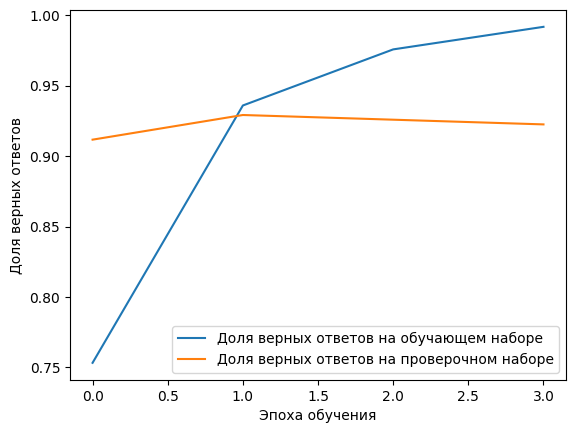

In [54]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [55]:
test_sequences = tokenizer.texts_to_sequences(test_d['Text'])

In [56]:
x_test = pad_sequences(test_sequences, maxlen=max_review_len)

In [57]:
y_test = test_d['Score'] - 1

In [58]:
y_test

12002    1
12003    1
12004    0
12005    1
12006    0
        ..
13994    0
13995    0
13996    0
13997    0
13998    1
Name: Score, Length: 1996, dtype: int64

In [59]:
model.evaluate(x_test, y_test, verbose=1)

63/63 [==============================] - 1s 9ms/step - loss: 0.2102 - accuracy: 0.9304


[0.21020522713661194, 0.930360734462738]

In [60]:
def seed_all(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.benchmark = True
        torch.backends.cudnn.deterministic = False
seed_all(42)

In [61]:
model = BertForSequenceClassification.from_pretrained('DeepPavlov/rubert-base-cased', num_labels=2)
tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')

config.json: 100%|██████████| 642/642 [00:00<?, ?B/s] 
pytorch_model.bin: 100%|██████████| 714M/714M [01:11<00:00, 10.0MB/s] 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
tokenizer_config.json: 100%|██████████| 24.0/24.0 [00:00<00:00, 8.38kB/s]
vocab.txt: 100%|██████████| 1.65M/1.65M [00:00<00:00, 2.54MB/s]
special_tokens_map.json: 100%|██████████| 112/112 [00:00<?, ?B/s] 
